# Machine learning by Andrew Ng
# Week02


Exercises below are a copy of Matlab one's but done in python. Comparison between numpy and Matlab can be found [here](http://mathesaurus.sourceforge.net/matlab-numpy.html).

# Exercise 1

In this exercise, you will implement linear regression and get to see it work on data.

# Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

In [2]:
import pandas as pd
import scipy as sp
import seaborn as sn
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
#load in the data, set header to None so that first line isn't assigned as header
data = pd.read_csv('ex1/ex1data1.txt', header = None)
data.columns = ['X','y']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
X    97 non-null float64
y    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


## Plotting the data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

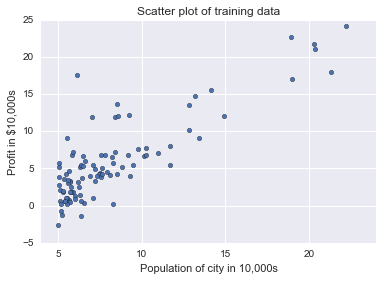

In [17]:
ax = data.plot(kind='scatter', x='X', y='y', xlim= (4,24), ylim=(-5,25))
ax.set_xlabel("Population of city in 10,000s")
ax.set_ylabel("Profit in $10,000s")
ax.set_title("Scatter plot of training data");

## Gradient Descent
In this part, you will fit the linear regression parameters θ to our dataset using gradient descent. 

In [18]:
iterations = 1500
alpha = 0.01
theta = np.zeros([2, 1]) # initialize fitting parameters

X = np.c_[np.ones(data.shape[0]),data.X] #convert to numpy, want to avoid any index related problems
y = np.c_[data.y]

The objective of linear regression is to minimize the cost function

$J(\theta)= \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^i)-y^i)^2$ 

where where the hypothesis 
$h_\theta(x)$ is given by the linear model 

$h_\theta (x)= \theta^Tx = \theta_0 + \theta_1x_1$

In [19]:
'''
define cost function J()
X is a dataframe of input features, plus a column of ones to accommodate theta 0; 
y is a vector that we are trying to predict using these features, and theta is an array of the parameters
'''
def computeCost(X,y,theta):
 
 m = len(data)
 v = X.dot(theta)-y #residuals

 #v = np.subtract(np.dot(X,theta)[0],y)
 #SD = np.dot(v.transpose(),v)
 #J = np.divide(SD,2*m)
 J = v.T.dot(v) / (2*m)

 return J

In [20]:
computeCost(X,y,theta)

array([[ 32.07273388]])

Recall that the parameters of your model are the $\theta{}_{j}$ values. These are the values you will adjust to minimize cost $J(\theta )$. One way to do this is to use the batch gradient descent algorithm

 $\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_0(x^i)-y^i)x^i_j$ 
 
 simultaneously update $\theta_j$ for all j. With each step of gradient descent, your parameters  $\theta_j $ come closer to the
optimal values that will achieve the lowest cost  $J(\theta)$.

In [21]:
'''
define a function that will implement the gradient descent algorithm
Implement the gradient descent algorithm, where alpha is the learning rate and num_iters is the number of iterations to run
'''
def gradientDescent(X,y,theta,alpha,num_iters):
  # type: (object, object, object, object, object) -> object
  
  Jhistory = np.zeros(num_iters) #initiate an empty list to store values of cost function after each cycle
  m = len(data)

  for num_iter in range(num_iters): #these update only once for each iteration
    v = X.dot(theta)-y #residuals
    delta = (alpha/m)*X.T.dot(v)

    #update all values in the same time
    theta = theta - delta
    Jhistory[num_iter] = computeCost(X, y, theta)

  return Jhistory, theta

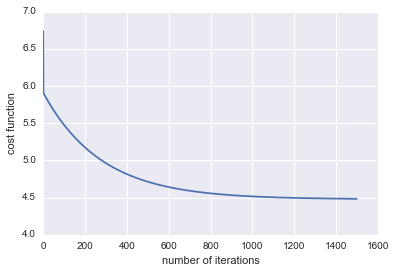

In [22]:
Jhistory, theta= gradientDescent(X,y,theta,alpha,iterations)  
# Check the output of Jhistory is decreasing towards a minimum
plt.plot(Jhistory);
plt.xlabel("number of iterations")
plt.ylabel("cost function");

## Plotting the linear regression fit

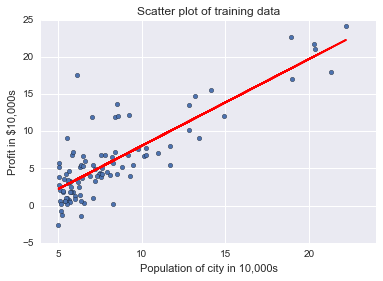

In [23]:
ax = data.plot(kind='scatter', x='X', y='y', xlim= (4,24), ylim=(-5,25))
ax.set_xlabel("Population of city in 10,000s")
ax.set_ylabel("Profit in $10,000s")
ax.set_title("Scatter plot of training data");
#linear regression fit
plt.plot(X[:,1],X.dot(theta),c='r');

Lets now predict the profit for a city with population of 35000 and 70000


In [24]:
print(theta.T.dot([1, 3.5])*10000)
print(theta.T.dot([1, 7])*10000)

[ 4519.7678677]
[ 45342.45012945]


## Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, you will now plot the cost over a 2-dimensional grid of θ 0 and θ 1 values. You will not need to code anything new for this part, but you should understand how the code you have written already is creating these images.

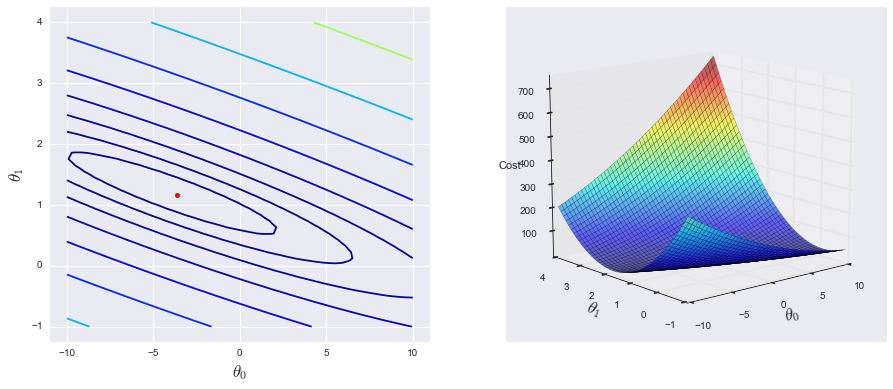

In [25]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

# Linear regression with multiple variables

* we can use multiple features to estimate our output
* hypothesis $h_\theta(x) = \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + ... + \theta_n x_n$ or $\theta^Tx$
* with  gradient descent we iterate through all the values x - make sure that we update all values in the same time


In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.


In [104]:
#load in the data
data = pd.read_csv('ex1/ex1data2.txt', header = None)
#data = np.loadtxt('ex1/ex1data2.txt', delimiter=',')

#X = np.c_[np.ones(data.shape[0]),data.iloc[:,:2]] #add intercept (1)
X =  np.c_[data.iloc[:,:2]]
y = np.c_[data.iloc[:,2]]

## Feature modelling

We got a few options here:

* creating new features by combining other ones
* most common is normalisation - we want to make sure that features got the same scale of values
* this way gradient descent will be more close to circle
* scale feature so each feature $-1 \leq x_i \leq 1$
	* be within $\pm e^2$
	* feature scalning and mean normalisation based on Z-number
	* $\frac{x-\mu}{sigma}$
* polynomial regression
 * or cubic function ect
 * if you do this make sure to apply feature scaling


### Feature normalisation

By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly. To do so we will:

* Subtract the mean value of each feature from the dataset.
* scale (divide) the feature by their respective standard deviations

The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within ±2 standard deviations of the mean); this is an alternative to taking the range of values (max-min).

In [13]:
'''
Normalizes the features in X 
returns a normalized version of X where the mean value of each feature is 0 and the standard deviation is 1
'''
def featureNormalize(X):
  nu = X.mean(axis=0)
  sigma = X.std(axis=0)
  X_norm =  (X - nu)/sigma
    
  return X_norm

We will normalise given values and then add the intercept. Note that we will use [stackoverflow approach](#http://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-an-numpy-array) to add row of ones.

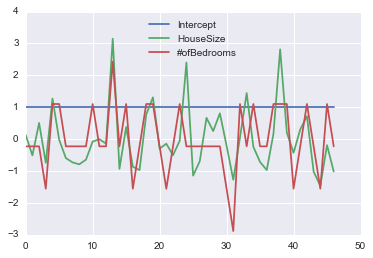

In [106]:
X_norm,nu,sigma = featureNormalize(X)

X = np.ones((X.shape[0],X.shape[1]+1))
X[:,1:X.shape[1]+1] = X_norm

#visualise
plt.plot(X);
legend(('Intercept','HouseSize','#ofBedrooms'),loc='upper center', shadow=True);

## Gradient Descent

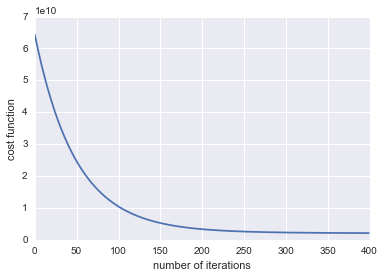

In [91]:
iterations = 400
alpha = 0.01
theta = np.zeros([3, 1]) # initialize fitting parameters
Jhistory, theta= gradientDescent(X,y,theta,alpha,iterations)  

plt.plot(Jhistory);
plt.xlabel("number of iterations")
plt.ylabel("cost function");

In [123]:
print 'Theta:',theta

Theta: [[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]


# Checking results
As we have normalised data to estimate linear regression we will have to normalise datapoint as well. This is confusing and not always recommend for regressions. A good overview of when to do it can  [be read here](http://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning/189655).

To demonstate how it works lets estimate the the price of a 1650 sq-ft, 3 br house.

In [125]:
datapoint = np.c_[1650,3]
#lets normalise
datapoint =  (datapoint - nu)/sigma
datapoint = np.insert(datapoint,0,1) #add 

print theta.T.dot(datapoint)

[ 289221.54737122]


# Finding the best learning rate

We recommend trying values of the learning rate $\alpha$ on a log-scale, at multiplicative steps of about 3 times the previous value (i.e., 0.3, 0.1, 0.03, 0.01 and so on). You may also want to adjust the number of iterations you are running if that will help you see the overall trend in the curve.

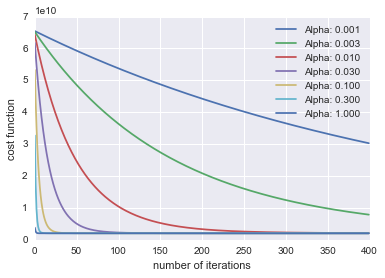

In [126]:
iterations = 400
alpha_list = [0.001,0.003,0.01,0.03,0.1,0.3,1,]
Jhistory= np.ones((iterations,len(alpha_list)))

for idx, alpha in enumerate(alpha_list): #these update only once for each iteration
  theta = np.zeros([3, 1]) # initialize fitting parameters
  Jhistory[:,idx], theta= gradientDescent(X,y,theta,alpha,iterations)
  #Jhistory = np.append(Jhistory,result, axis=1)

plt.plot(Jhistory);
legend(['Alpha: {:.3f}'.format(s) for s in alpha_list],loc='upper right', shadow=True);
plt.xlabel("number of iterations")
plt.ylabel("cost function");

# The normal equation

* solve data analytically instead of gradient descent
* calculate $\frac{dJ(\theta)}{dx} = 0$ for each parameter $\theta$
* to minmalise we use $(X^TX)^{-1}X^Ty$
* should need less iterations than gradient decent
* gradient descent works well even if n is large, while normal eq slow if n is large
* need to compute $A^{-1}$ $O(n^3)$
* normal equation will not work for more complex algorithms
* normal equation non-inconvertibility (degenerated matrix)
	* use sudo invertion instead (pinv)
	* redundant features
	* too many features
		* remove some features
		* use regularisation

The closed-form solution to linear regression is $\theta = (X^TX)^{-1}X^T\overset{\rightarrow}{y}$. Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence” like in gradient descent.

In [89]:
Q = np.linalg.inv(X.T.dot(X))
theta = Q.dot(X.T).dot(y)
theta

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

# Exam questions

1. Suppose m=4 students have taken some class, and the class had a midterm exam and a final exam. You have collected a dataset of their scores on the two exams, which is as follows (..). You'd like to use polynomial regression to predict a student's final exam score from their midterm exam score

In [15]:
examScore = np.array([89,72,94,69])
#featureNormalize(examScore)
(examScore-mean(examScore))/(max(examScore)-min(examScore))

array([ 0.32, -0.36,  0.52, -0.48])

2. What are reasons for using feature scaling?


* It speeds up gradient descent by making it require fewer iterations to get to a good solution.